In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mug_cakes import BayesianOptimizer as BO
from tqdm import tqdm

In [3]:
def target(x):
    return -((x * 20 - 10) ** 2) / 50 + np.sin(x * 20)

In [26]:
X = np.empty((0, 1))
y = np.empty(0)

In [27]:
gp.k(X, X)

array([], shape=(0, 0), dtype=float64)

100%|███████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 185.78it/s]


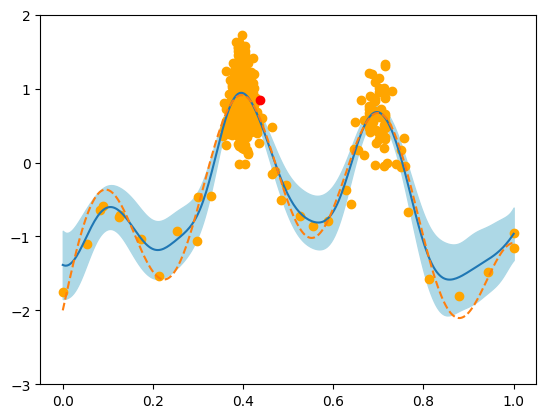

In [71]:
noise = 0.3
scale = 1 / 20
gp = BO(1, noise, 1 / 20)

for j in tqdm(range(500)):
    # m, v = gp.predict(X_star)
    # i = np.argmax(m + 1 * v ** 0.5)
    new_x = gp.ucb(z=5, X_star=X_star)
    new_y = target(new_x) + (np.random.normal(0, noise))
    gp.add(new_x[None], new_y)
m, v = gp.predict(X_star)

fig, ax = plt.subplots()
# ax.fill_between(X_star.reshape(-1), m - 2 * v ** 0.5, m + 2 * v ** 0.5, color=(0, 0, 1, 0.1))
ax.fill_between(X_star.reshape(-1), m - 1 * v**0.5, m + 1 * v**0.5, color="lightblue")
ax.plot(X_star, m)
ax.plot(X_star, target(X_star), "--")
ax.scatter(gp._X[:-1], gp._y[:-1], color="orange")
ax.scatter(gp._X[-1:], gp._y[-1:], color="red")
ax.set_ylim(-3, 2);

In [41]:
np.hstack(
    [
        v.reshape(-1, 1)
        for v in np.meshgrid(
            np.linspace(0, 1, 10), np.linspace(0, 1, 10), np.linspace(0, 1, 10)
        )
    ]
)

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111],
       [0.        , 0.        , 0.22222222],
       ...,
       [1.        , 1.        , 0.77777778],
       [1.        , 1.        , 0.88888889],
       [1.        , 1.        , 1.        ]])

In [37]:
X

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.11111111],
       [0.        , 0.        , 0.22222222],
       ...,
       [1.        , 1.        , 0.77777778],
       [1.        , 1.        , 0.88888889],
       [1.        , 1.        , 1.        ]])

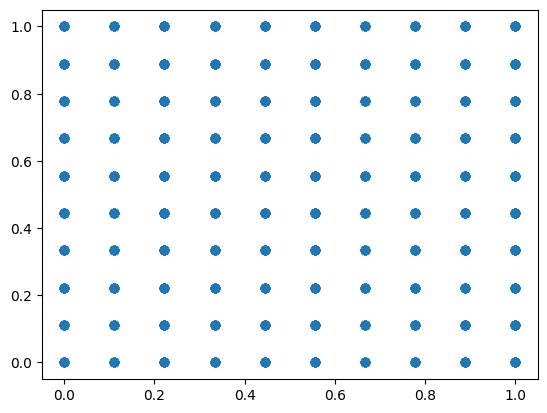

In [39]:
plt.scatter(X[:, 2], X[:, 1])

In [ ]:
u